In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.models as models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
%matplotlib inline
import os
from numpy import *
from PIL import Image


C:\Users\Hitanshu Dalwadi\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


5


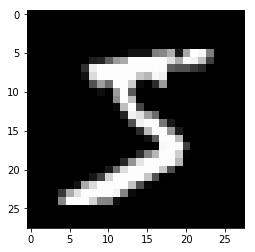

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(y_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.show()


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255


In [66]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(rate=0.2))
model.add(Dense(11,activation=tf.nn.softmax))

In [67]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.2012 - acc: 0.9385
Epoch 2/3
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.0747 - acc: 0.9769
Epoch 3/3
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.0492 - acc: 0.9846


In [68]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 4s 359us/sample - loss: 0.0676 - acc: 0.9795


[0.06755895628848811, 0.9795]

In [54]:
x_typed = []
for i in os.listdir('typed_digit_dataset\dataset'):
    x_typed.append(array(Image.open('typed_digit_dataset\dataset/' + i).convert('L')).flatten())
x_typed = (255-reshape(x_typed, (567, 28, 28, 1)).astype('float32'))/255


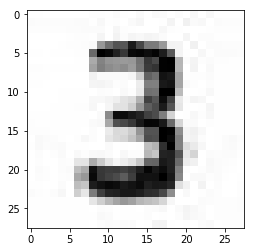

In [55]:
plt.imshow(x_typed[57].reshape(28,28), cmap='Greys')

In [58]:
y_typed = [0,1,0,0,7,8,0,0,0,0,8,0,0,4,0,9,0,0,0,0,5,6,0,0,0,1,0,1,0,0,0,6,0,0,0,5,0,4,0,9,1,5,0,7,2,0,6,7,0,8,0,4,0,0,0,0,0,3,0,0,1,0,0,0,7,0,8,9,0,0,2,3,0,0,0,0,0,4,0,0,0]
y_typed.extend([5,3,0,0,7,0,0,0,0,6,0,0,1,9,5,0,0,0,0,9,8,0,0,0,0,6,0,8,0,0,0,6,0,0,0,3,4,0,0,8,0,3,0,0,1,7,0,0,0,2,0,0,0,6,0,6,0,0,0,0,2,8,0,0,0,0,4,1,9,0,0,5,0,0,0,0,8,0,0,7,9])
y_typed.extend([0,0,6,4,8,1,3,0,0,0,2,0,0,0,0,0,4,0,7,0,0,0,0,0,0,0,9,8,0,0,0,9,0,0,0,4,6,0,0,3,4,2,0,0,1,5,0,0,0,6,0,0,0,2,3,0,0,0,0,0,0,0,5,0,9,0,0,0,0,0,7,0,0,0,5,7,1,6,2,0,0])
y_typed.extend([0,0,0,0,0,0,0,0,0,0,1,2,0,3,4,5,6,7,0,3,4,5,0,6,1,8,2,0,0,1,0,5,8,2,0,6,0,0,8,6,0,0,0,0,1,0,2,0,0,0,7,0,5,0,0,0,3,7,0,5,0,2,8,0,8,0,0,6,0,7,0,0,2,0,7,0,8,3,6,1,5])
y_typed.extend([1,5,4,8,7,3,2,9,6,3,8,6,5,9,2,7,1,4,7,2,9,6,4,1,8,3,5,8,6,3,7,2,5,1,4,9,9,7,5,3,1,4,6,2,8,4,1,2,9,6,8,3,5,7,6,3,1,4,5,7,9,8,2,5,9,8,2,3,6,4,7,1,2,4,7,1,8,9,5,6,3])
y_typed.extend([1,2,3,4,5,6,7,8,9,4,5,6,7,8,9,1,2,3,7,8,9,1,2,3,4,5,6,5,6,7,8,9,1,2,3,4,8,9,1,2,3,4,5,6,7,2,3,4,5,6,7,8,9,1,9,1,2,3,4,5,6,7,8,6,7,8,9,1,2,3,4,5,3,4,5,6,7,8,9,1,2])
y_typed.extend([9,3,4,5,6,8,1,2,7,8,2,6,7,1,4,5,9,3,1,5,7,9,2,3,4,6,8,2,7,8,1,5,9,3,4,6,6,4,1,3,8,7,2,5,9,3,9,5,6,4,2,7,8,1,5,6,3,4,9,1,8,7,2,7,8,9,2,3,5,6,1,4,4,1,2,8,7,6,9,3,5])

In [60]:
for i in range(len(y_typed)):
    if y_typed[i] == 0:
        y_typed[i] = 10

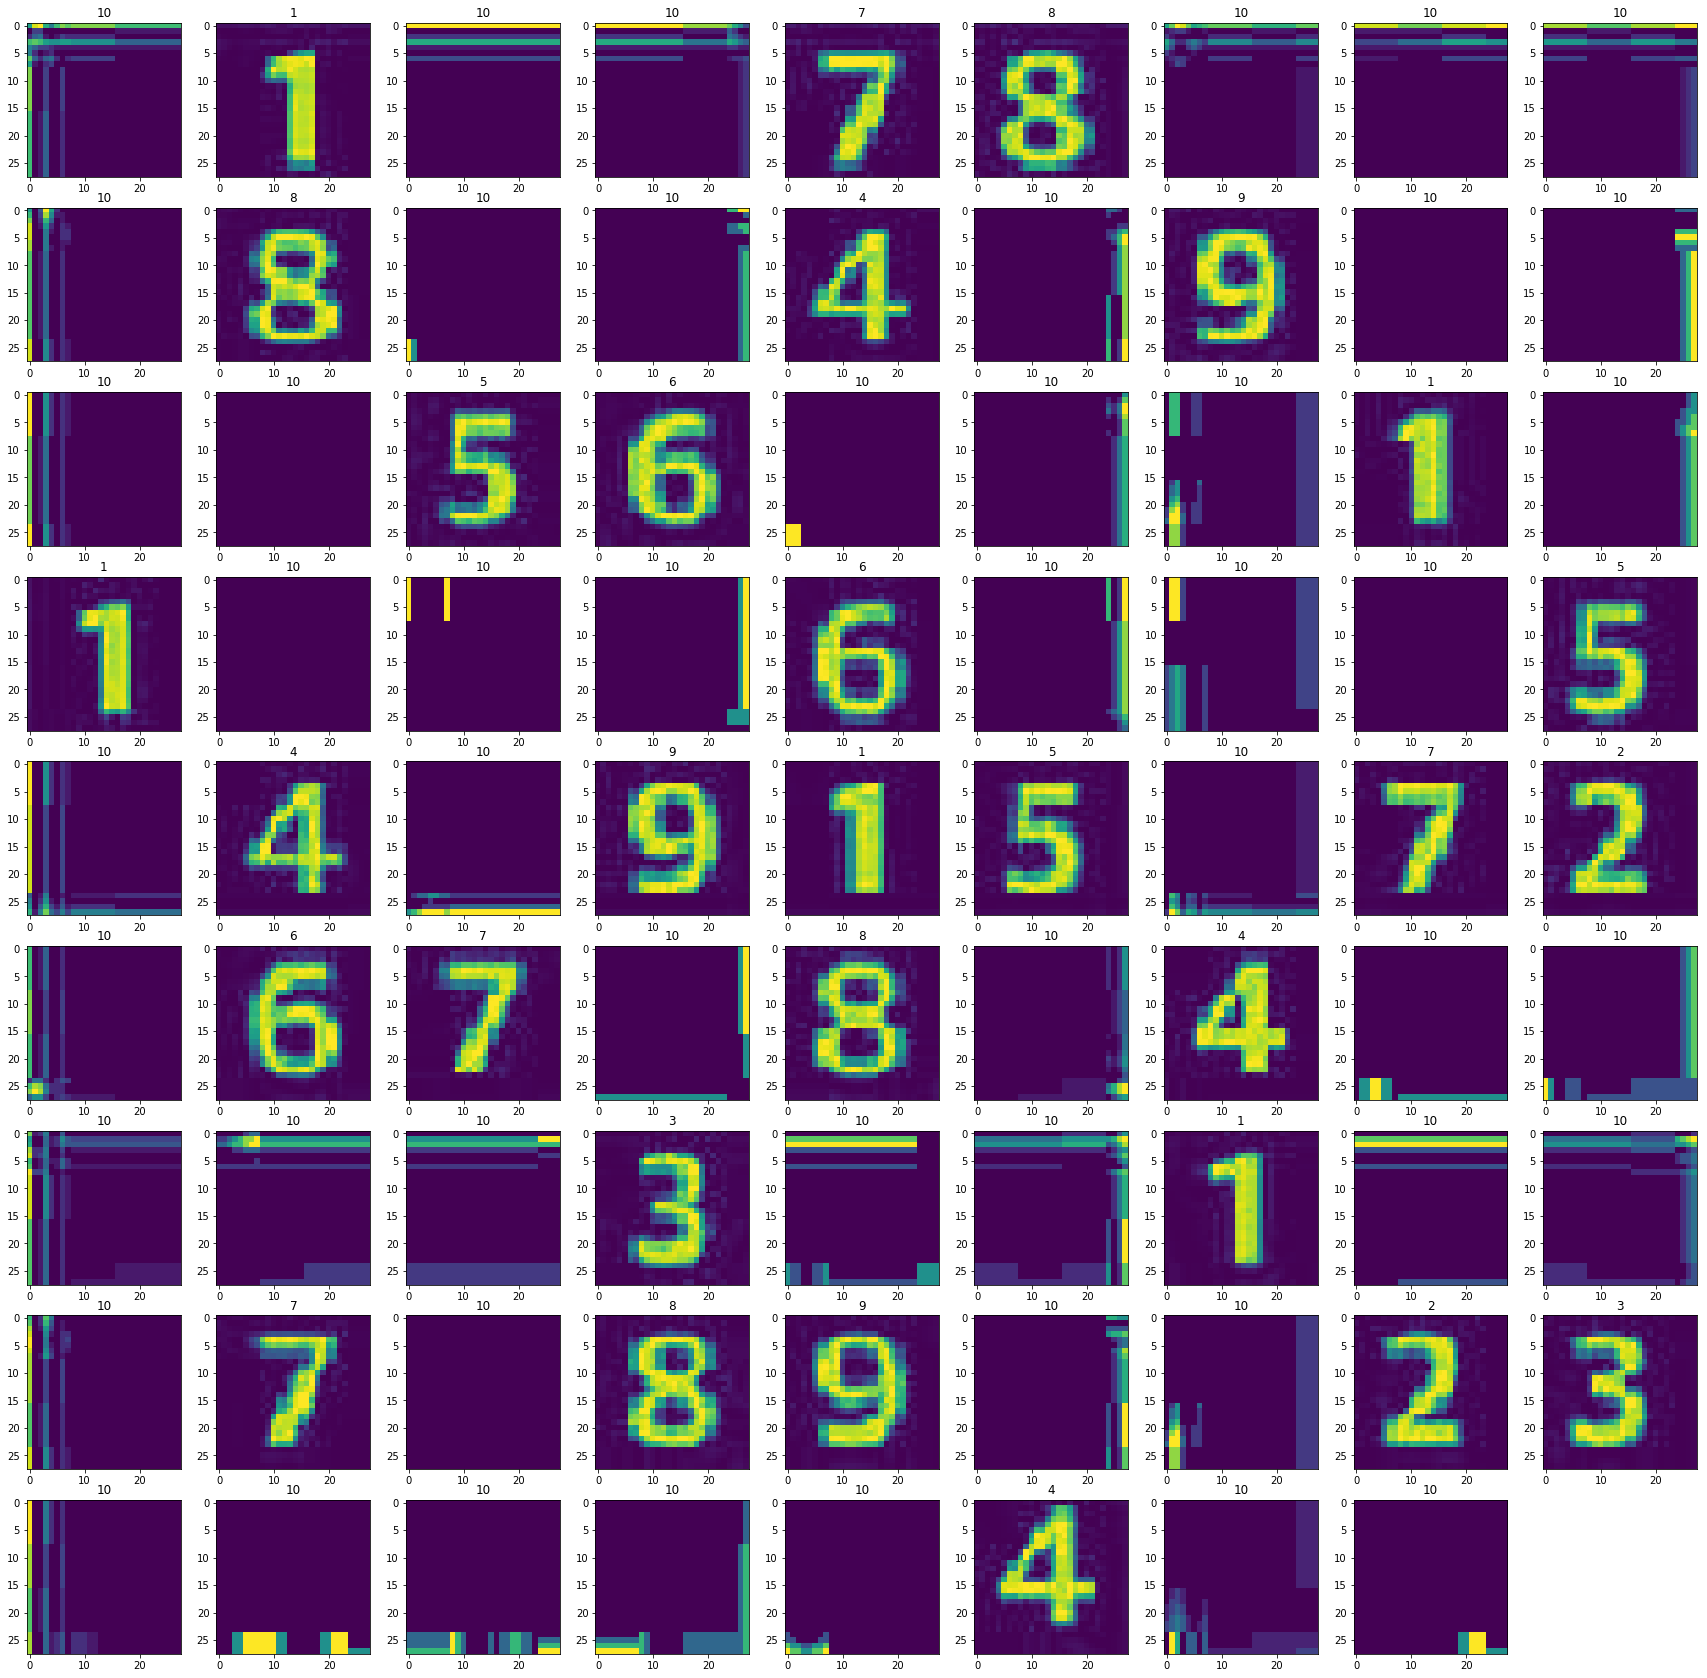

In [61]:
plt.figure(figsize = (30,30))
for i in range(80):
    plt.subplot(9,9,i+1)
    plt.imshow(x_typed[i].reshape(28,28))
    plt.title(y_typed[i])

In [69]:

model.fit(x=x_typed, y=y_typed, epochs=10)

Epoch 1/10
567/567 [==============================] - 1s 1ms/sample - loss: 1.5753 - acc: 0.6138
Epoch 2/10
567/567 [==============================] - 1s 1ms/sample - loss: 0.1890 - acc: 0.9524
Epoch 3/10
567/567 [==============================] - 1s 1ms/sample - loss: 0.0380 - acc: 0.9929
Epoch 4/10
567/567 [==============================] - 1s 1ms/sample - loss: 0.0151 - acc: 0.9965
Epoch 5/10
567/567 [==============================] - 1s 1ms/sample - loss: 0.0078 - acc: 1.0000
Epoch 6/10
567/567 [==============================] - 1s 1ms/sample - loss: 0.0034 - acc: 1.0000
Epoch 7/10
567/567 [==============================] - 1s 1ms/sample - loss: 0.0024 - acc: 1.0000
Epoch 8/10
567/567 [==============================] - 1s 1ms/sample - loss: 0.0026 - acc: 1.0000
Epoch 9/10
567/567 [==============================] - 1s 1ms/sample - loss: 0.0019 - acc: 1.0000
Epoch 10/10
567/567 [==============================] - 1s 1ms/sample - loss: 0.0017 - acc: 1.0000


In [ ]:
import random

fig = plt.figure(figsize = (15.0, 40.0))
for i in range(50):
    image_index = random.randint(0,9999)
    ax = fig.add_subplot(10,5,i+1)
    ax.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
    pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
    plt.title("Prediction: " + str(pred.argmax()) + "  Label: " + str(y_test[image_index]))
plt.show()
x_test[image_index].reshape(1, 28, 28, 1)

In [71]:
model.save('digit_reader_for_sudoku.model')